<a href="https://colab.research.google.com/github/ramimagnatera/ADA-informes/blob/main/Informe5_RadixSort.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Problema de ordenamiento

Para este tipo de problemas, se nos entrega un arreglo de números los que vienen desordenados y mediante un algoritmo, en este caso el RadixSort, deberán quedar ordenados de menor a mayor. A continuación se muestra un ejemplo de como será la entrada y salida a nuestro problema:


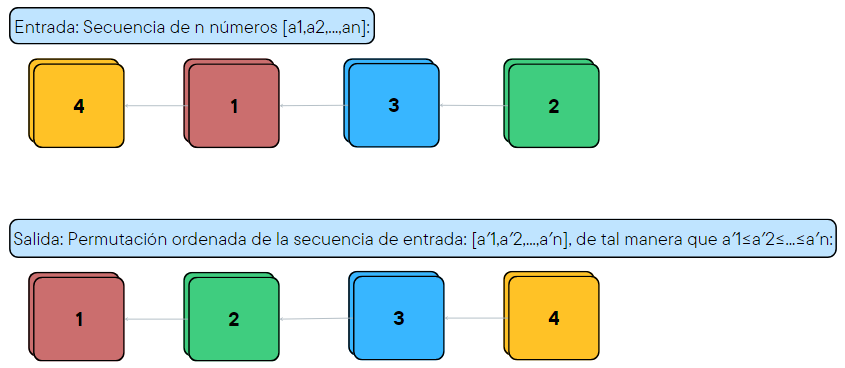

Los problemas de ordenamiento son de los más comunes dentro del mundo de la computación, esto debido a su gran demanda e importancia a la hora de optimizar procesos. Por lo que se han desarrollado diversas técnicas e algoritmos para resolver este problema, unos más eficientes que otros dependiendo de los datos de entrada que se esten ingresando.

# 2. RadixSort

## 2.1 Descripción del Algoritmo

Este algoritmo ordena los números dígito por dígito, partiendo desde la última cifra hasta la primera. Por ejemplo si tenemos números de tres digitos, el algoritmo comienza ordenando por milésimas, luego las céntesimas y finalmente las décimas de los números. Como se muestra en la siguiente imagen:

<a href="https://imgur.com/MQ6HZJy"><img src="https://imgur.com/MQ6HZJy.png" title="source: imgur.com" /></a>

Para ordenar de menor a mayor por digito lo hace mediante la llamada a una función externa llamada "countingSort", la cual es muy eficiente a la hora de ordenar elementos de un solo digito. Básicamente, lo que realiza CountingSort es lo siguiente:

1.   Recorre el arreglo y para cada elemento $x$ del arreglo, usamos un contador $C[x]$ para contar los elementos menores o iguales a $x$.

2.   Suma acumulativamente el contenido del arreglo contador para designar las posiciones finales

3.   Recorre inversamente el arreglo de entrada, obteniendo la posición del elemento mediante el arreglo contador e insertando cada elemento en el arreglo de salida **directamente en la posición que le corresponde** (y se disminuye en uno la cantidad del arreglo contador).



##2.2 Código

###A continuación se mostrará la implementación del RadixSort:


In [61]:
from termcolor import colored
def countingSort(arr, exp1,verbose):
 
    n = len(arr)

    output_arr = [0] * (n) # Arreglo auxiliar que guardará los elementos ordenados
 
    count_arr = [0] * (10) # Arreglo de contadores inicializados en 0
    
    if(verbose == True):
          print("Arreglo hasta el momento: ",arr)
          print("\nRELLENAR ARREGLO CONTADOR\n") 

    # Se recorre el largo del arreglo de entrada
    for i in range(0, n):
        index = arr[i] // exp1 # Se trunca el número hasta el digito que queremos ordenar
        count_arr[index % 10] += 1 # Se aumenta el arreglo contador en la posición del número
        if(verbose == True):
          print("Posición",i)
          print("Entrada: [",str(arr[:i])[1:-1],",",colored(f"{str(arr[i])}","red"),",",str(arr[i+1:])[1:-1],"]")
          print("Contador: [",str(count_arr[:(index%10)])[1:-1],",",colored(f"{str(count_arr[index%10])}","blue"),",",str(count_arr[(index%10)+1:])[1:-1],"]") 
    
    if(verbose == True):
      print("\nSUMAR ARREGLO CONTADOR\n")

    # Se suma el contenido del arreglo acumuladamente hasta la ultima posición
    for i in range(1, 10):
        count_arr[i] += count_arr[i - 1]
        if(verbose == True):
          print("[",str(count_arr[:i])[1:-1],",",colored(f"{str(count_arr[i])}","blue"),",",str(count_arr[i+1:])[1:-1],"]")


    if(verbose == True):
      print("\nArreglo contador final: ",count_arr)
      print("\nINSERTAR EN ARREGLO AUXILIAR ORDENADO\n")

    # Se arma el arreglo de auxiliar (output)
    i = n - 1
    while i >= 0:
        index = arr[i] // exp1 # Se trunca el número hasta el digito
        output_arr[count_arr[index % 10] - 1] = arr[i] # Se ingresa el número ordenado en el output_arr
        count_arr[index % 10] -= 1 # Se disminuye en 1 el contador en la posición del número

        if(verbose == True):
          print("Arreglo de entrada: [",str(arr[:i])[1:-1],",",colored(f"{str(arr[i])}","red"),",",str(arr[i+1:])[1:-1],"]")
          print("Arreglo contador: [",str(count_arr[:((index%10)-1)])[1:-1],",",colored(f"{str(count_arr[index%10])}","blue"),",",str(count_arr[(index%10)-1:])[1:-1],"]") 
          print("Arreglo ordenado: [",str(output_arr[:count_arr[index % 10]])[1:-1],",",colored(f"{str(output_arr[count_arr[index % 10]])}","green"),",",str(output_arr[(count_arr[index % 10]-1)+2:])[1:-1],"]\n")
        i -= 1

    if(verbose == True):
      print("Arreglo ordenado Hasta el momento: ",output_arr)

    # Se copia el arreglo auxiliar en el arreglo de entrada
    for i in range(0, len(arr)):
        arr[i] = output_arr[i]


def radixSort(arr, verbose = False):

    maximo = max(arr) # Se obtiene el número más grande del array
    exp = 1
    i = 1
    while maximo / exp >= 1:
        if(verbose == True):
          print("\n----- Ordenando el dígito número ", i,"-----\n")
          i+=1
        countingSort(arr,exp,verbose) # Llamada a la función
        exp *= 10

# Ejemplo
arr = [61,10,3,413,310,990,16]
print("Arreglo de entrada:", arr,"\n")
radixSort(arr,verbose = False)
print("Arreglo de salida:", arr)

Arreglo de entrada: [61, 10, 3, 413, 310, 990, 16] 

Arreglo de salida: [3, 10, 16, 61, 310, 413, 990]


##2.3 Ejemplo:

A continuación se mostrará un ejemplo de como funciona el **RadixSort**:

<a href="https://imgur.com/pZNxcyD"><img src="https://imgur.com/pZNxcyD.png" title="source: imgur.com" /></a>

Por cada vuelta, se llama a la función **CountingSort**, la cual se encarga de ordenar los dígitos de forma creciente, a continuación se muestra un ejemplo de su funcionamiento:



1.   Se crea el arreglo contador

<a href="https://imgur.com/wfhMT7E"><img src="https://imgur.com/wfhMT7E.png" title="source: imgur.com" /></a>
2.   Luego, Se rellena el arreglo contador

<a href="https://imgur.com/RvjCjkM"><img src="https://imgur.com/RvjCjkM.png" title="source: imgur.com" /></a>

3. Se suma acumulativamente el contenido de contador para designar las posiciones finales

<a href="https://imgur.com/VYdgn50"><img src="https://imgur.com/VYdgn50.png" title="source: imgur.com" /></a>

4. Finalmente se rellena en un arreglo auxiliar

<a href="https://imgur.com/MEp0MJu"><img src="https://imgur.com/MEp0MJu.png" title="source: imgur.com" /></a>

Luego solo copia el arreglo auxiliar en el arreglo de entrada para terminar con el arreglo original ordenado.

##2.4. Ejecución del algoritmo paso a paso con verbose=True

In [5]:
import random
arr = random.sample(range(10, 500), 5)
print("Arreglo de entrada:", arr)
radixSort(arr,verbose=True)
print("\nArreglo de salida:", arr)


Arreglo de entrada: [475, 424, 137, 350, 145]

----- Ordenando el dígito número  1 -----

Arreglo hasta el momento:  [475, 424, 137, 350, 145]

RELLENAR ARREGLO CONTADOR

Posición 0
Entrada: [  , 475 , 424, 137, 350, 145 ]
Contador: [ 0, 0, 0, 0, 0 , 1 , 0, 0, 0, 0 ]
Posición 1
Entrada: [ 475 , 424 , 137, 350, 145 ]
Contador: [ 0, 0, 0, 0 , 1 , 1, 0, 0, 0, 0 ]
Posición 2
Entrada: [ 475, 424 , 137 , 350, 145 ]
Contador: [ 0, 0, 0, 0, 1, 1, 0 , 1 , 0, 0 ]
Posición 3
Entrada: [ 475, 424, 137 , 350 , 145 ]
Contador: [  , 1 , 0, 0, 0, 1, 1, 0, 1, 0, 0 ]
Posición 4
Entrada: [ 475, 424, 137, 350 , 145 ,  ]
Contador: [ 1, 0, 0, 0, 1 , 2 , 0, 1, 0, 0 ]

SUMAR ARREGLO CONTADOR

[ 1 , 1 , 0, 0, 1, 2, 0, 1, 0, 0 ]
[ 1, 1 , 1 , 0, 1, 2, 0, 1, 0, 0 ]
[ 1, 1, 1 , 1 , 1, 2, 0, 1, 0, 0 ]
[ 1, 1, 1, 1 , 2 , 2, 0, 1, 0, 0 ]
[ 1, 1, 1, 1, 2 , 4 , 0, 1, 0, 0 ]
[ 1, 1, 1, 1, 2, 4 , 4 , 1, 0, 0 ]
[ 1, 1, 1, 1, 2, 4, 4 , 5 , 0, 0 ]
[ 1, 1, 1, 1, 2, 4, 4, 5 , 5 , 0 ]
[ 1, 1, 1, 1, 2, 4, 4, 5, 5 , 5 ,  ]

Arreg

# 3. Tiempo de ejecución

### **Teorema (Tiempo de ejecución).**

  *El algoritmo **RadixSort** tiene un **tiempo de ejecución de** $O(n+k)$* 

## Prueba del teorema

Para probar el teorema debemos analizar que es lo que hace la función, la cual donde por cada dígito hace una llamada a la función CountingSort. Por lo que al ser una cantidad "$d$" constante, el tiempo de ejecución pasa a depender directamente de CountingSort.

Por otro lado tenemos el tiempo de ejecución de la función CountingSort, donde tenemos 4 ciclos principales:

- Al crear el arreglo contador e inicializarlo en cero, lo haremos hasta el digito mayor, por lo que tenemos un tiempo de $O(k)$

- Al contar la cantidad de dígitos y guardarlo en contador, debemos recorrer todo el arreglo por lo que tenemos un tiempo de $O(n)$

- Al recorrer el arreglo contador y sumar su contenido nos da un tiempo $O(k)$

- Al armar nuevamente el arreglo, debemos recorrer el arreglo de entrada para ir insertando los elementos, es decir un tiempo de $O(n)$

Por lo que tiempo resultante de CountingSort es de $O(k) + O(n) + O(k) + O(n)$, lo que es igual a $O(n+k)$

Al juntar ambos tiempos de ejecución tenemos $O(d(n+k))$, pero al no ser significativas la cantidad de llamadas de RadixSort, nos termina dando un tiempo de $O(n+k)$. Al no ser un algoritmo de comparaciones, el RadixSort logra ordenar los elementos en un tiempo lineal en todos sus casos, siendo más eficiente que algoritmos recursivos tales como el BubbleSort o QuickSort.

# 4. Correctitud 

### **Teorema (Correctitud CountingSort).**

*El algoritmo **CountingSort** genera un arreglo: $[a_1',a_2',...,a_n']$, con los mismos elementos del arreglo de entrada ordenados de menor a mayor, es decir,* $a_1'\leq a_2' \leq... \leq a_n'$.


## Prueba del Teorema

Para probar el teorema lo haremos mediante la inducción matemática:

Caso Base ($n=1$): 

*Cuando tenemos que el tamaño del arreglo es uno, en cada llamada al countingsort, se creará un arreglo de contador y añadirá el digito en la posición correspondiente, para luego insertar nuevamente ese elemento en el arreglo auxiliar que será de tamaño uno, por lo que por consecuencia al tener un único dato, el algoritmo retornara el arreglo ordenado.*

Caso General ($n>1$): 

*Para cualquier caso, lo único que cambia a comparación del caso base es el tamaño del arreglo auxiliar, puesto que deberá pasar por los mismos ciclos.
En el primer ciclo se crea un vector llamado Contador de longitud igual a k (número más grande) y se inicializa en 0, el segundo ciclo se cuenta la cantidad de ocurrencias por digito y se guarda en el arreglo contador. El tercer ciclo es sumar acumulativamente el arreglo contador hasta la última posición.  El  último  ciclo es para rearmar el arreglo pero esta vez de manera ordenada, consultando las posiciones en el arreglo contador e insertadolas en el arreglo auxiliar ordenado. Después que los datos de entrada han pasado por los diferentes ciclos de este algoritmo, finalizara cuando todos los valores de entrada estén en su posición correspondiente, entregandonos el arreglo de forma ordenada.*

**Correctitud**

Finalmente, por inducción matemática se puede demostrar que tanto para un caso base, como para un caso general el algoritmo cumple con su función, por tanto podemos decir que al **finalizar la n-ésima iteración del algoritmo**, se que genera un arreglo $[a_1',a_2',...,a_n']$ con los mismos elementos del arreglo de entrada ordenados de menor a mayor.

# 5. Experimentos

## 5.1. Número de comparaciones

A continuación se muestra gráficamente una comparación de tiempo de ejecución entre:

* RadixSort

* BucketSort

Los arreglos de entrada son desde tamaño 5 hasta 500, con números generados aleatoriamente haciendo un sampling entre 1 y 1000.

In [12]:
def insertionSort(b):
    for i in range(1, len(b)):
        up = b[i]
        j = i - 1
        while j >= 0 and b[j] > up: 
            b[j + 1] = b[j]
            j -= 1
        b[j + 1] = up     
    return b        
def bucket_sort(input_list):
    max_value = max(input_list)
    size = max_value/len(input_list)
    buckets_list= []
    for x in range(len(input_list)):
        buckets_list.append([]) 
    for i in range(len(input_list)):
        j = int (input_list[i] / size)
        if j != len (input_list):
            buckets_list[j].append(input_list[i])
        else:
            buckets_list[len(input_list) - 1].append(input_list[i])
    for z in range(len(input_list)):
        insertionSort(buckets_list[z])
    final_output = []
    for x in range(len (input_list)):
        final_output = final_output + buckets_list[x]
    return final_output

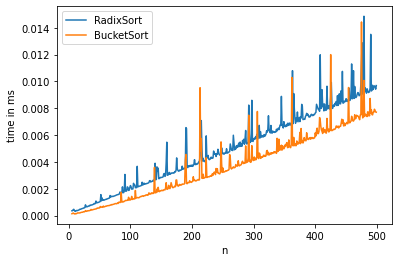

In [23]:
import matplotlib.pyplot as plt
import datetime
from timeit import repeat
import random

x=[]; y=[]; y1=[]
verbose = False
for n in range(5,500):
  a = random.sample(range(1, 1000), n)

  t1 = repeat(setup="from __main__ import radixSort", stmt=f"radixSort({a},{verbose})", repeat=1, number=10)
  t2 = repeat(setup="from __main__ import bucket_sort", stmt=f"bucket_sort({a})", repeat=1, number=10)

  x.append(n)
  y.append(t1)
  y1.append(t2)

plt.plot(x,y)
plt.plot(x,y1)
plt.legend(["RadixSort","BucketSort"])

plt.xlabel('n')
plt.ylabel('time in ms')
plt.show()

### Análisis de resultados

De la gráfica podemos analizar que ambos algoritmos tienen tiempos de ejecución lineales, puesto que no se basan en la comparación ni recursividad, siendo bastante eficientes. Por otro lado están los picks de tiempo que pueden deberse a una irregularidad del sistema, o en el caso del bucketSort, pueden haber casos en donde el tiempo de ejecución depende del algoritmo que se implemente, que en este caso es el insertion sort, por lo que puede llegar a tener un tiempo de $O(n^2)$ en casos especificos.